**Productivity Prediction of Garment Employees**

I chose the "Productivity Prediction of Garment Employees" dataset because it provides detailed information about how different factors affect productivity in the garment industry. By analyzing this data, I hope to learn more about how factors like labor input and resource usage impact productivity, which can help companies improve their operations. This project is a chance to explore predictive models that could revolutionize how garment manufacturing companies plan and optimize their processes, ultimately leading to increased productivity and success.

Here , From this data I am curious to learn about

Analyze targeted vs. actual productivity alignment and its influencing factors.
Explore correlation between workforce size, overtime, and productivity.
Investigate style change impact on productivity across departments/teams.


**Dataset Details**

Dataset Name : Productivity Prediction of Garment Employees

Dataset link : https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

Type Of study : Observational study

Data Collection Methodology :
This dataset contains significant characteristics of both the garment manufacturing process and employee productivity. The data was gathered manually and validated by industry experts.


Each entry in the dataset likely corresponds to a specific record documenting the daily productivity metrics of individual employees or teams, offering detailed insights into operational effectiveness.

Variables:

date: Date in MM-DD-YYYY format.
day: Day of the week.
quarter: Portion of the month.
department: Associated department.
team_no: Team number.
no_of_workers: Workers per team.
no_of_style_change: Style change count.
targeted_productivity: Targeted team productivity.
smv: Standard Minute Value for tasks.
wip: Work in progress items.
over_time: Overtime duration.
incentive: Financial motivation amount.
idle_time: Production interruption duration.
idle_men: Idle worker count.
actual_productivity: Actual productivity percentage.

**Project Objectives**

Analyze the impact of incentive schemes on garment employee productivity.

Evaluate the effectiveness of goal-setting in meeting productivity targets.

Identify and recommend management practices for optimizing productivity and minimizing variance in output.

In [ ]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.svm import SVC


**Load Data**

In [ ]:
#Read the data
PGE = pd.read_csv("/content/garments_worker_productivity.csv")
data = pd.DataFrame(PGE)
data.head().T

,0,1,2,3,4
date,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015
quarter,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1
department,sweing,finishing,sweing,sweing,sweing
day,Thursday,Thursday,Thursday,Thursday,Thursday
team,8,1,11,12,6
targeted_productivity,0.8,0.75,0.8,0.8,0.8
smv,26.16,3.94,11.41,11.41,25.9
wip,1108.0,NaN,968.0,968.0,1170.0
over_time,7080,960,3660,3660,1920
incentive,98,0,50,50,50


In [ ]:
data.shape

(1197, 15)

There are 1197 rows and 15 columns.

In [ ]:
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

The dataset has four objects, Quarter, Department and day are considered as categorical variables and the rest are intergers,float.

**Data Quality Check**

In [ ]:
#Check for missing values
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Missing values found.

Checking for duplicates

In [ ]:
#Check for duplicate values
dc= data.duplicated().sum()
print(f"Duplicate rows found: {dc}")

Duplicate rows found: 0


There are no duplicate values

Removing rows with  missing values and making sure all observations are complete.

In [ ]:
clean_data=data.dropna()
clean_data.shape

(691, 15)

After Removing missing values there are 691 rows.

In [ ]:
#Computing summary statistics
clean_data = clean_data.drop(columns=['date', 'quarter', 'department', 'day', 'team'])
clean_data.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,cluster
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.723980,23.245412,1190.465991,6508.205499,44.483357,0.130246,0.639653,0.260492,52.445731,0.722013,0.609262
std,0.102006,6.976497,1837.455001,2864.505604,27.596591,0.934273,4.283652,0.537185,9.417353,0.154784,0.834493
min,0.070000,10.050000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.233705,0.000000
25%,0.700000,18.790000,774.500000,4560.000000,30.000000,0.000000,0.000000,0.000000,52.000000,0.661470,0.000000
50%,0.750000,22.520000,1039.000000,6840.000000,45.000000,0.000000,0.000000,0.000000,57.000000,0.750608,0.000000
75%,0.800000,28.080000,1252.500000,7200.000000,60.000000,0.000000,0.000000,0.000000,58.000000,0.800402,1.000000
max,0.800000,54.560000,23122.000000,25920.000000,138.000000,11.000000,45.000000,2.000000,89.000000,1.100484,2.000000


**Exploratory Data Analysis**

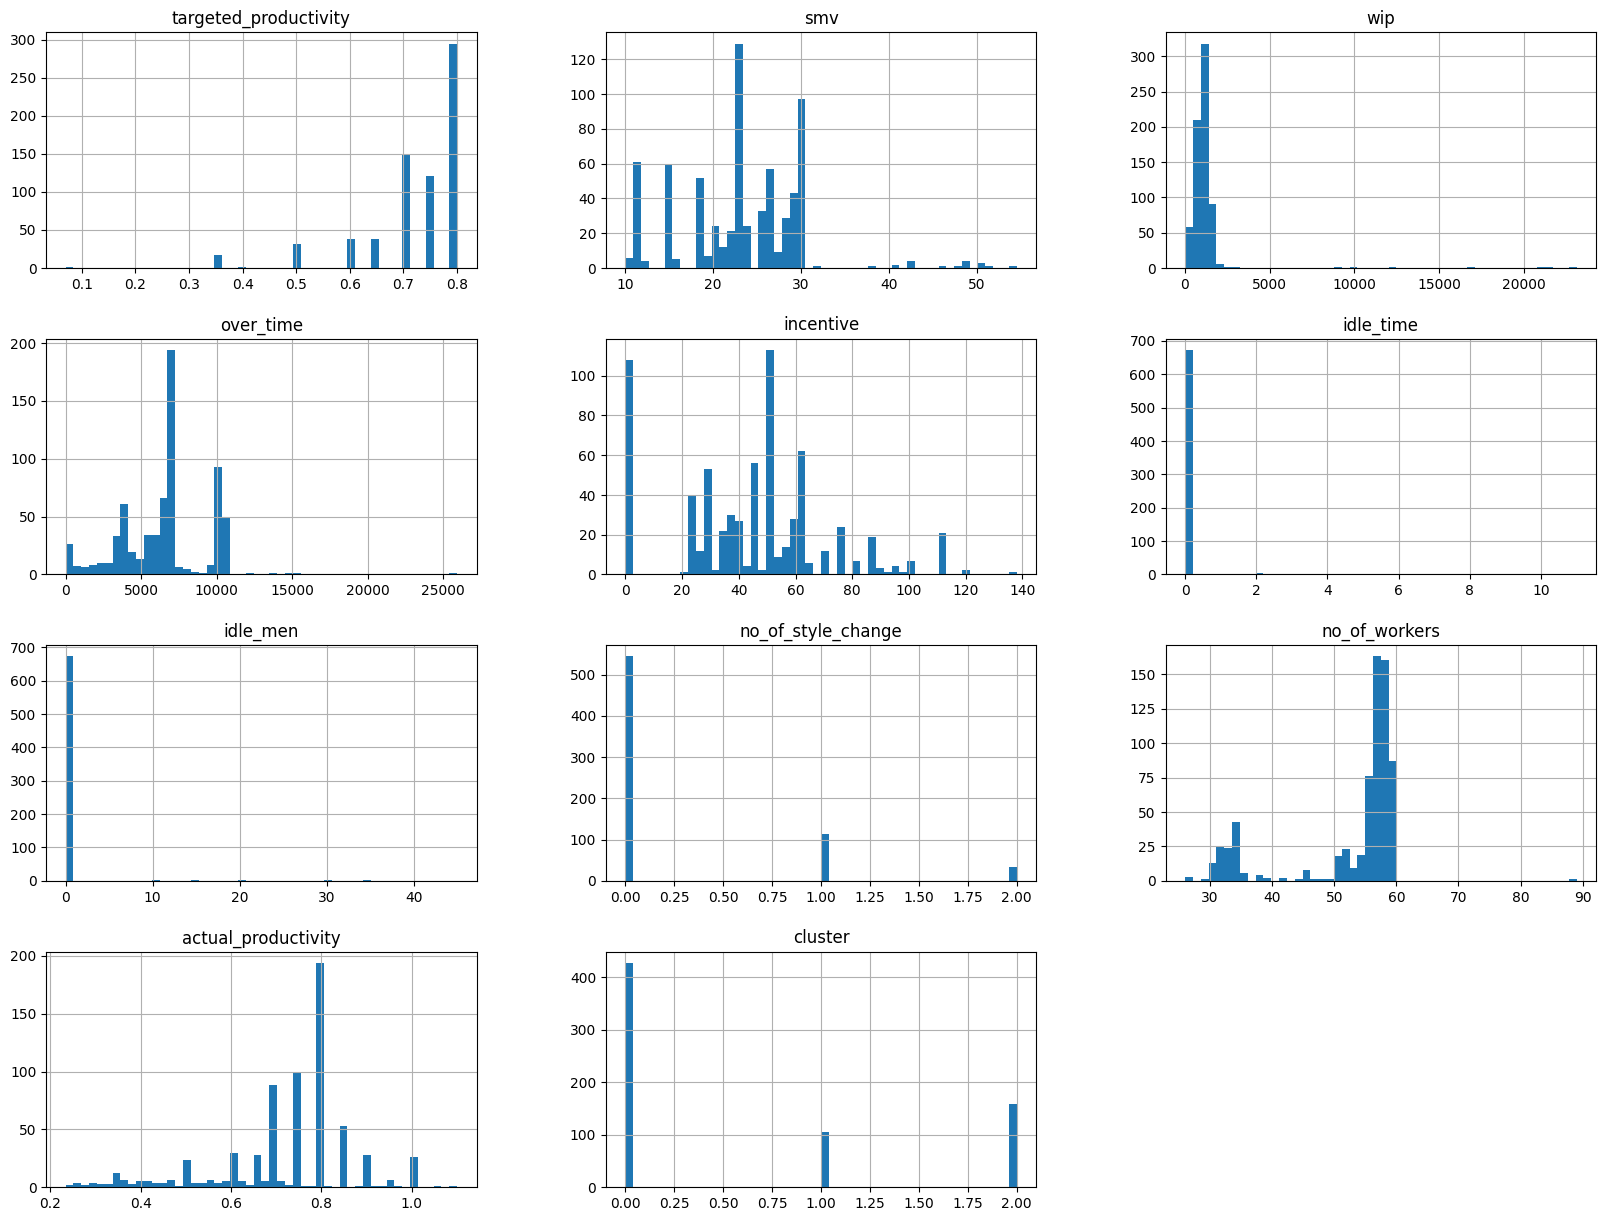

In [ ]:
#Histogram
clean_data.hist(bins=50, figsize=(20,15))
plt.show();

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Comparison of Targeted vs. Actual Productivity')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Productivity')

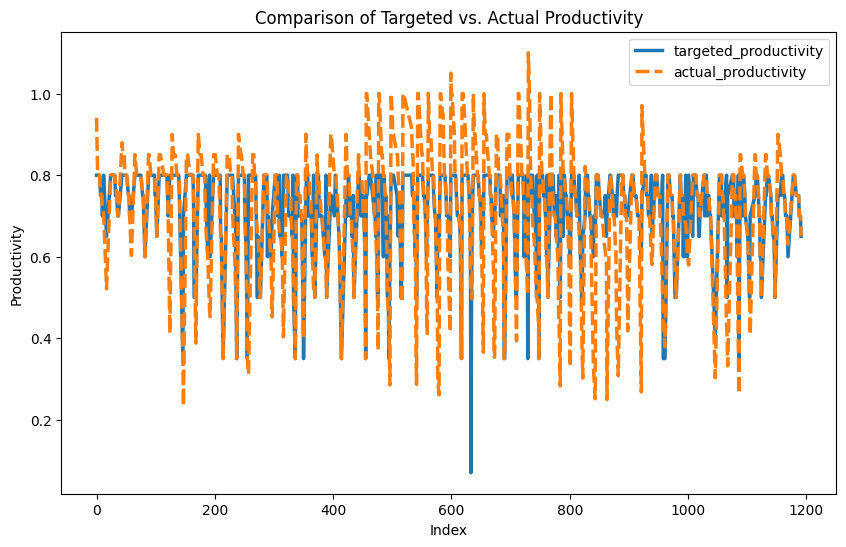

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=clean_data[['targeted_productivity', 'actual_productivity']], palette="tab10", linewidth=2.5)
plt.title('Comparison of Targeted vs. Actual Productivity')
plt.xlabel('Index')
plt.ylabel('Productivity')
plt.show()

This plot shows a clear visual representation of how often actual productivity meets or exceeds the targets.

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

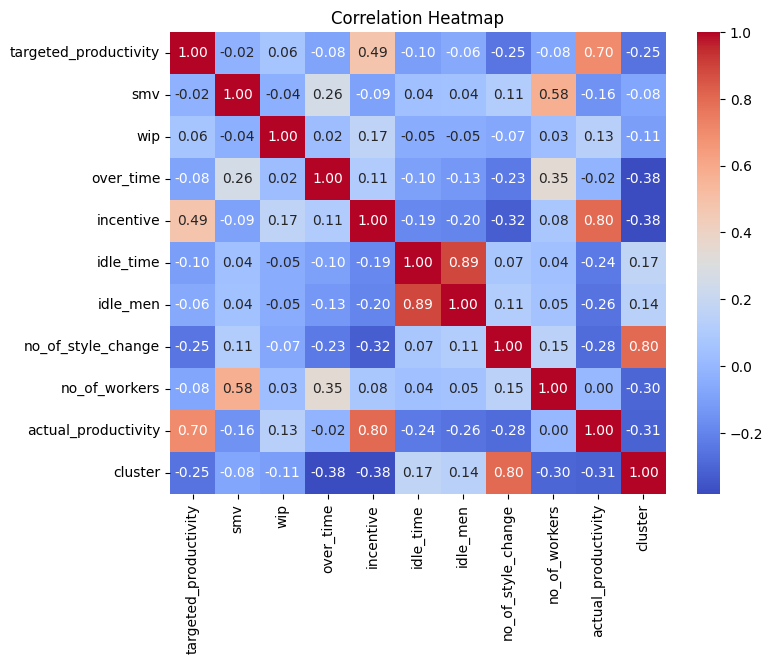

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(clean_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The strong positive correlation (0.80) between incentives and actual productivity suggests that financial incentives effectively boost worker output. Similarly, the same positive correlation (0.80) between overtime and actual productivity indicates that extended working hours are also contributing significantly to increased production levels.

In [ ]:
encoder = LabelEncoder()
clean_data['idle_time'] = encoder.fit_transform(clean_data['idle_time'])
# Select relevant features for clustering
ftrs = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'no_of_style_change', 'no_of_workers']
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_data[ftrs])
scaled_data

array([[ 0.74579521,  0.41807496, -0.04491306, ..., -0.1395099 ,
        -0.48527217,  0.69648199],
       [ 0.74579521, -1.69769805, -0.12116059, ..., -0.1395099 ,
        -0.48527217, -2.33203821],
       [ 0.74579521, -1.69769805, -0.12116059, ..., -0.1395099 ,
        -0.48527217, -2.33203821],
       ...,
       [-0.23525275,  1.03774543, -0.15057036, ..., -0.1395099 ,
         1.37763376,  0.48395425],
       [-0.23525275,  0.02360881, -0.03402056, ..., -0.1395099 ,
         1.37763376, -1.53505921],
       [-0.72577672,  1.03774543, -0.13913323, ..., -0.1395099 ,
         1.37763376,  0.48395425]])

These clusters help in identifying different operational behaviors and can guide tailored strategies for enhancing productivity and optimizing workforce deployment within the garment manufacturing sector.

**Agglomerative Hierarchical Clustering**

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3)
clean_data['cluster'] = cluster.fit_predict(scaled_data)

In [ ]:
cluster_means = clean_data.groupby('cluster').mean()
print(cluster_means)

         targeted_productivity        smv          wip    over_time  \
cluster                                                               
0                     0.734393  24.633481  1347.855140  7487.383178   
1                     0.780952  14.945524   969.019048  4491.904762   
2                     0.657911  25.001076   911.284810  5195.696203   

         incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
cluster                                                                      
0        51.443925   0.037383  0.315421            0.002336      56.780374   
1        45.676190   0.000000  0.000000            0.000000      32.657143   
2        24.835443   0.468354  1.943038            1.132911      53.854430   

         actual_productivity  
cluster                       
0                   0.748356  
1                   0.769338  
2                   0.619204  


Cluster 0: Shows the highest average targeted productivity (0.73493) and actual productivity (0.74836), coupled with the highest incentive (51.44). This cluster likely represents highly motivated and efficiently managed groups with substantial workloads.

Cluster 1: Exhibits a lower targeted productivity (0.78049) but a higher actual productivity (0.76938) than Cluster 0, with the lowest incentive (45.67) and significantly lower overtime (4491.93). This indicates efficient productivity achievements despite lower incentives and reduced working hours, suggesting effective operational management.

Cluster 2: Has the lowest targeted (0.65791) and actual productivity (0.6193), with very low incentive (24.85). This suggests a possible inefficiency where despite high work hours, both the productivity target and output are the lowest, pointing to areas needing managerial intervention.



Text(0.5, 0, 'Targeted Productivity')

Text(0, 0.5, 'Actual Productivity')

Text(0.5, 1.0, 'Clustering of Garments Worker Productivity')

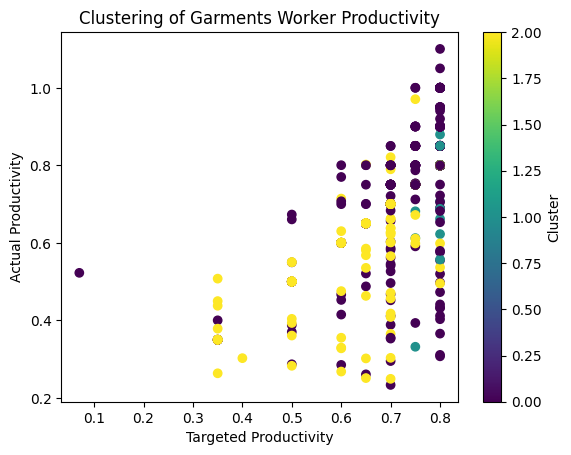

In [ ]:
plt.scatter(clean_data['targeted_productivity'], clean_data['actual_productivity'], c=clean_data['cluster'], cmap='viridis')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.title('Clustering of Garments Worker Productivity')
plt.colorbar(label='Cluster')
plt.show()

The plot enables a direct comparison between targeted and actual productivity. Most data points seem to be gathered around a line that would represent perfect alignment between targeted and actual productivity, indicating a general trend where workers meet their productivity targets. However, significant variability in actual productivity is noticeable at different levels of targeted productivity.

**Logistic Regression**

In [ ]:
median_productivity = clean_data['actual_productivity'].median()
clean_data['High_Productivity'] = (clean_data['actual_productivity'] > median_productivity).astype(int)

In [ ]:
clean_data.drop(columns=['actual_productivity'], inplace=True)

In [ ]:
X = clean_data.drop('High_Productivity', axis=1)
y = clean_data['High_Productivity']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize and train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

LogisticRegression()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[92 14]
 [ 4 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       106
           1       0.88      0.96      0.92       102

    accuracy                           0.91       208
   macro avg       0.92      0.91      0.91       208
weighted avg       0.92      0.91      0.91       208



<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

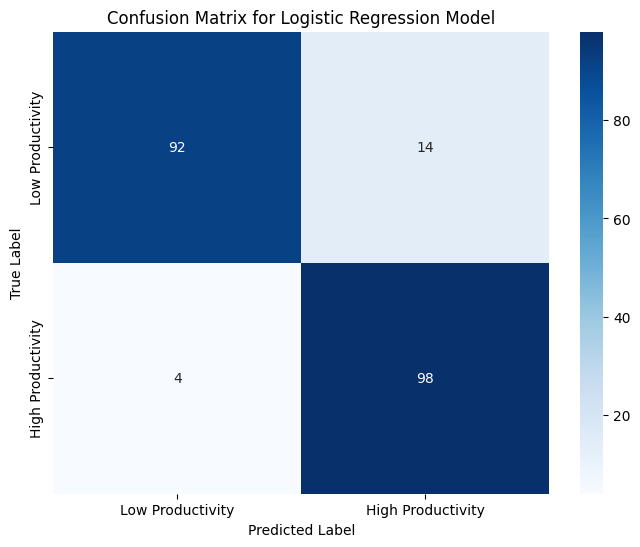

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Productivity', 'High Productivity'], yticklabels=['Low Productivity', 'High Productivity'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

 Metrics above  illustrate that the model is quite accurate in predicting productivity levels but could improve in reducing the number of false positives to enhance precision. The high recall indicates that the model is effective at capturing actual high productivity cases, which is crucial for ensuring that high-performing workers are recognized and potentially rewarded.

**Conclusion**


The analysis of the "Productivity Prediction of Garment Employees" dataset through logistic regression and clustering reveals key insights into optimizing workforce productivity. Cluster 0 demonstrates how high incentives correlate with high productivity, highlighting the effectiveness of motivational strategies in achieving optimal results. Cluster 1 effectively meets its productivity targets with minimal deviation between targeted and actual outputs, exemplifying operational precision and effective management practices. These findings underline the importance of well-tailored incentive schemes and precise goal-setting in boosting productivity and operational efficiency in the garment industry, suggesting that strategic resource allocation and nuanced management approaches can significantly impact production outcomes.

**Refrences**

Productivity Prediction of Garment Employees : https://www.kaggle.com/code/arashsolgi/productivity-prediction-of-garment-employees/notebook

Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C51S6D.
